In [1]:
import pandas as pd

In [2]:
xs = pd.read_csv('shapella-high-res/balances4.csv', index_col='slot')

In [3]:
def sweeps(xs):
    '''
    dict(swept(xs))
    '''
    prev = 0
    slots = sorted(xs)
    zs = [xs[x] for x in slots]
    for slot, (previous, current) in zip(slots[1:], zip(zs, zs[1:])):
        # print(slot, previous, current)
        if previous > current:
            yield (slot, previous - current)

In [4]:
def f(col):
    xs = col.to_dict()
    zs = {x: 0 for x in xs}
    zs.update(dict(sweeps(xs)))
    # print(col)
    zs = pd.Series(zs)
    zs.name = col.name
    zs.index.name = col.index.name
    # print(col)
    # print(zs)
    # raise ValueError
    return zs
zs = xs.apply(f)

In [5]:
zs.to_csv('sweeps.csv')

In [6]:
zs.sum(axis=1).to_csv('rewards_per_slot.csv')

In [7]:
zs.sum(axis=1).cumsum().to_csv('cumsum_per_slot.csv')

In [8]:
zs = zs.sum(axis=1).cumsum() #.plot(figsize=(21, 7));

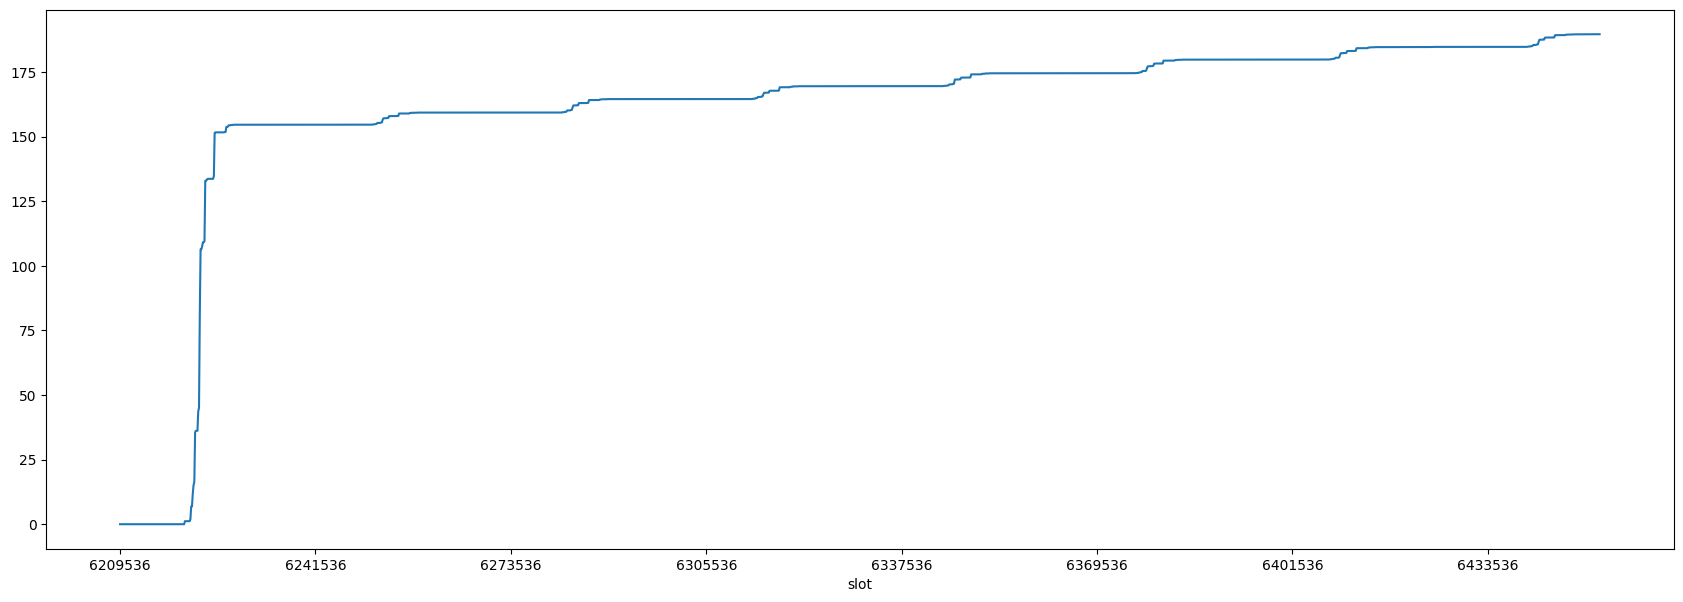

In [9]:
zz = zs.copy()
zz.index = zz.index.map(str)
zz.plot(figsize=(21, 7));